# Gold Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
 # print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


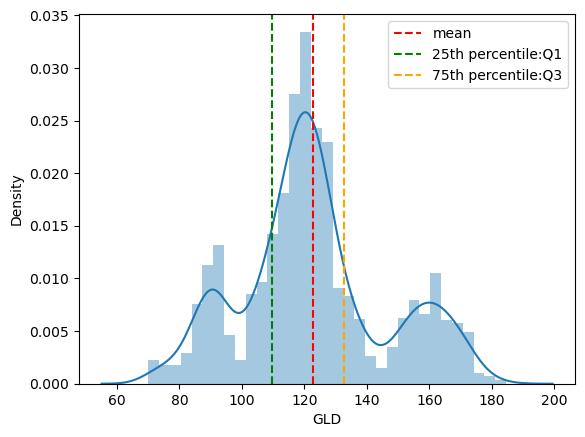

In [9]:
# to check normality of the data
sns.distplot(gold_data['GLD'])
plt.axvline(x=np.mean(gold_data['GLD']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(gold_data['GLD'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(gold_data['GLD'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

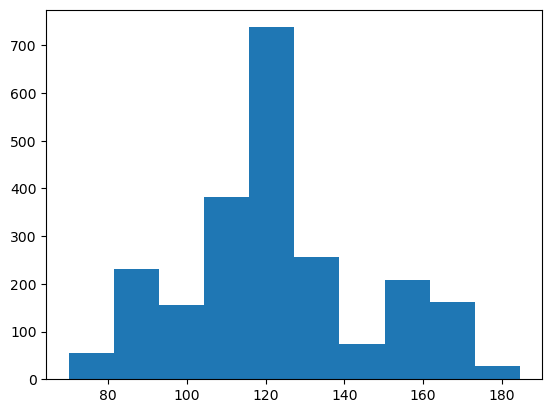

In [10]:
plt.hist(gold_data["GLD"])
plt.show()

# Find Outliers In Data

<AxesSubplot:>

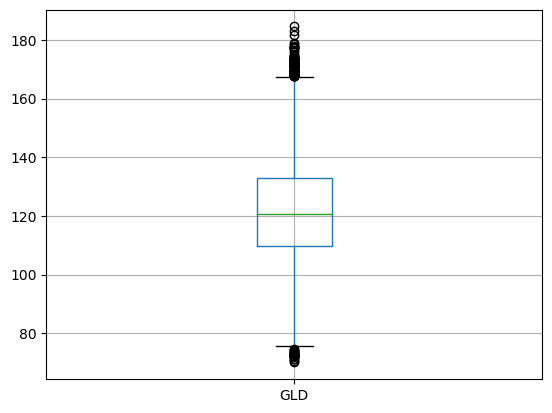

In [11]:
gold_data.boxplot(column=["GLD"])

# Check Trend Data

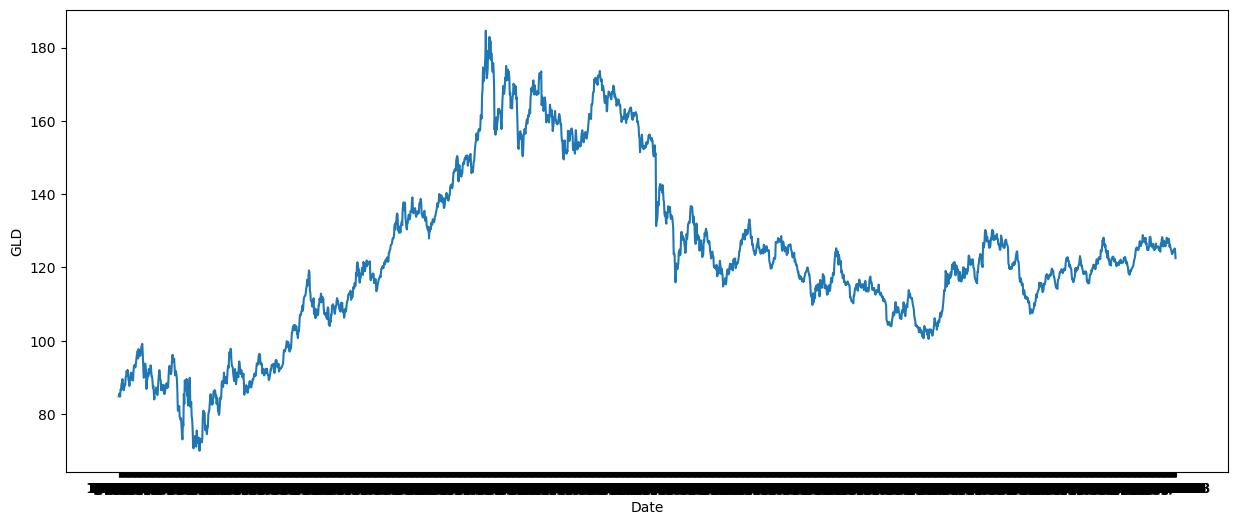

In [12]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='Date',y='GLD',data=gold_data)
plt.show(series1)

# Correlation:

Positive Correlation
Negative Correlation

In [13]:
correlation = gold_data.corr()

<AxesSubplot:>

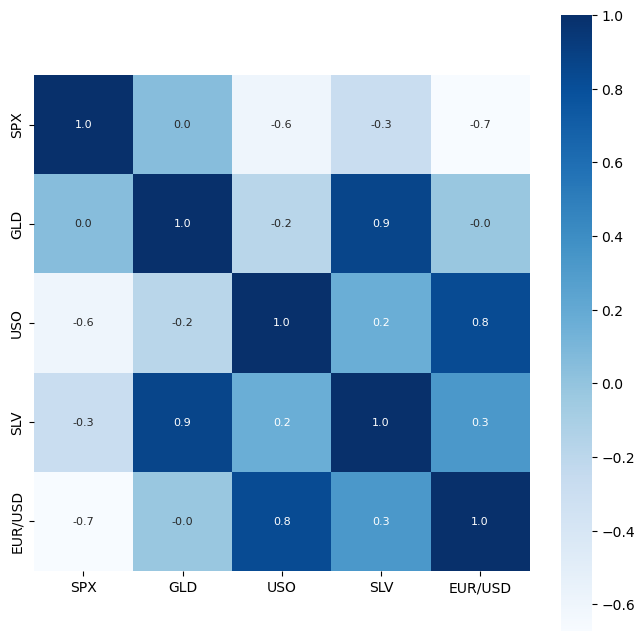

In [14]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

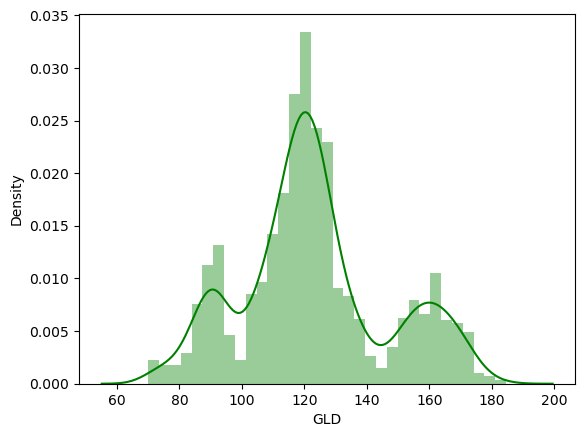

In [16]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model Training: Random Forest Regressor

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [23]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[169.04339966  82.20480004 115.73140017 127.63090111 120.92460122
 154.65599806 150.13679866 126.1394004  117.49559863 125.92780089
 116.90300079 172.03030089 141.61879933 167.94319882 115.29300029
 117.55810048 137.84420273 170.14780081 159.68640266 159.51919944
 155.19550028 125.23989984 175.67529931 157.25210372 125.12150062
  93.81159963  76.99500025 120.85640013 119.09839958 167.57380006
  88.2591007  125.33749992  91.30620077 117.7067003  120.99999945
 136.88870123 115.54540115 115.40090034 146.80519894 107.28550105
 104.40460242  87.05609782 126.48360067 118.02350014 154.560399
 119.78299994 108.31459975 108.13939805  93.13040067 127.07219795
  74.65370071 113.75419947 121.21260015 111.31099924 118.94489916
 120.63369942 159.25379953 167.97530054 147.12339688  85.94049869
  94.17630029  86.7962987   90.68190048 118.94940086 126.47170102
 127.61769996 167.88749996 122.29819921 117.3145989   98.32330023
 168.11470158 142.94989888 132.28440254 121.23390229 121.09169918
 119.5810006

In [25]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898217405148949


# Compare the Actual Values and Predicted Values in a Plot

In [26]:
Y_test = list(Y_test)

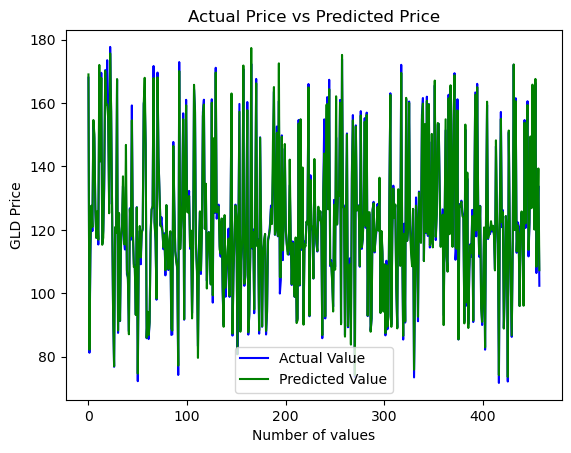

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
 the gold price prediction involves using a random forest regression model to analyze a dataset
containing gold prices, stock market prices, and exchange rates. The process includes steps such as data preprocessing, data 
visualization, and model evaluation.

The purpose of using a random forest regression model for gold price prediction is to create a predictive model that can
effectively capture the complex relationships between gold prices and the other variables in the dataset.

To handle missing values in the dataset, I used methods such as imputation or removal of incomplete data
points to ensure the accuracy of the analysis.

The correlation between gold prices and other variables, such as stock market prices and exchange rates, is likely explored
using techniques like correlation analysis and visualization to understand the relationships and potential impact on
gold price prediction.